In [8]:
library(ggplot2)
library(sf)
library(rgeos)

Warning message:
"package 'rgeos' was built under R version 3.5.1"rgeos version: 0.4-2, (SVN revision 581)
 GEOS runtime version: 3.6.1-CAPI-1.10.1 
 Linking to sp version: 1.3-1 
 Polygon checking: TRUE 



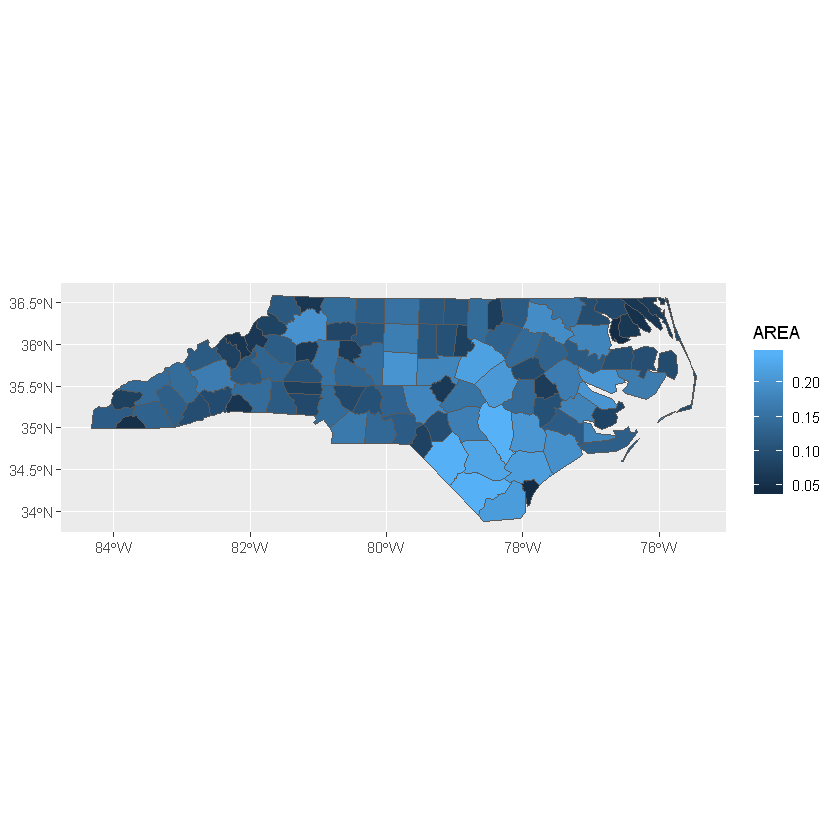

In [3]:
nc <- sf::st_read(system.file("shape/nc.shp", package = "sf"),
                      quiet = TRUE)
    
ggplot(nc) +
  geom_sf(aes(fill = AREA))

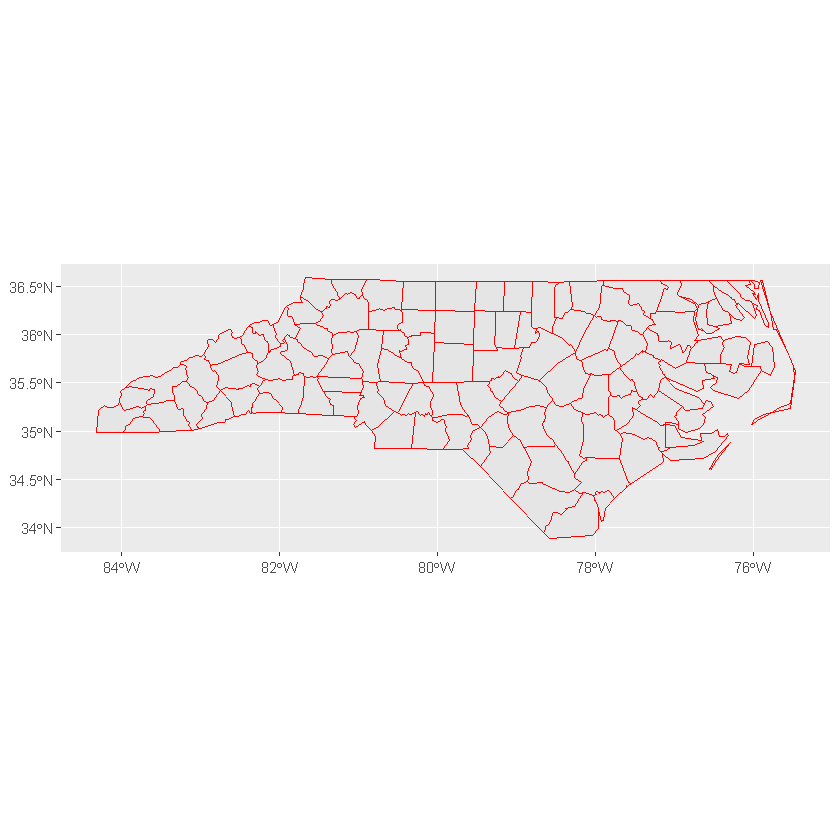

In [4]:
# If not supplied, coord_sf() will take the CRS from the first
# layer and automatically transform all other layers to use
# that CRS. This ensures that all data will correctly line up

nc_3857 <- sf::st_transform(nc, "+init=epsg:3857")

ggplot() +
  geom_sf(data = nc) +
  geom_sf(data = nc_3857, colour = "red", fill = NA)

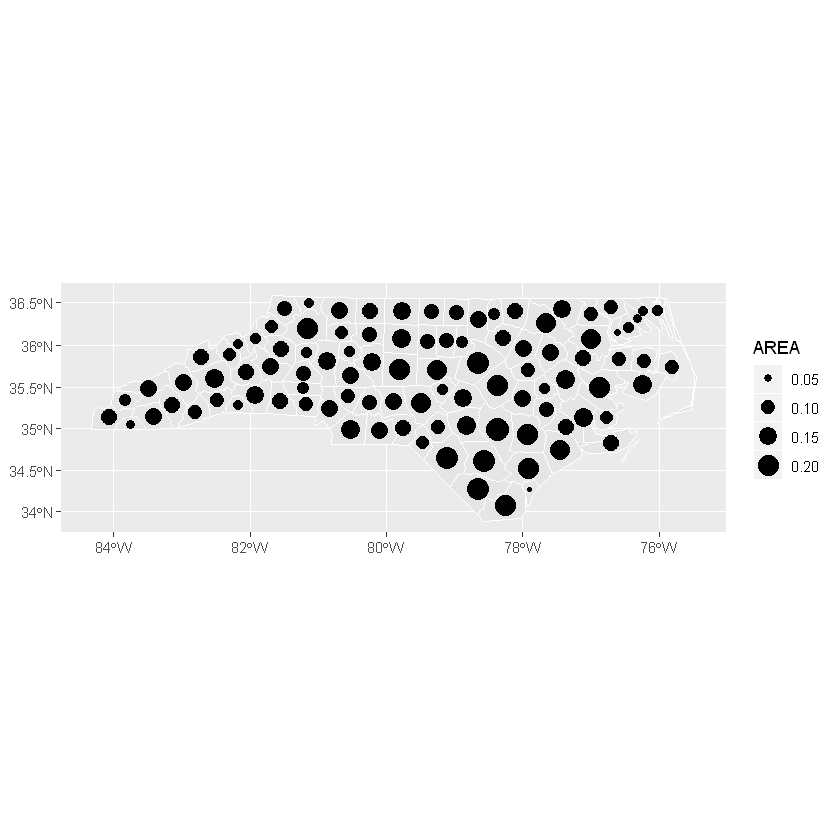

In [5]:
# Unfortunately if you plot other types of features, you'll
# need to use show.legend to tell ggplot2 what type of
# legend to use
    
nc_3857$mid <- sf::st_centroid(nc_3857$geometry)
    
ggplot(nc_3857) +
  geom_sf(colour = "white") +
  geom_sf(aes(geometry = mid, size = AREA), 
          show.legend = "point")

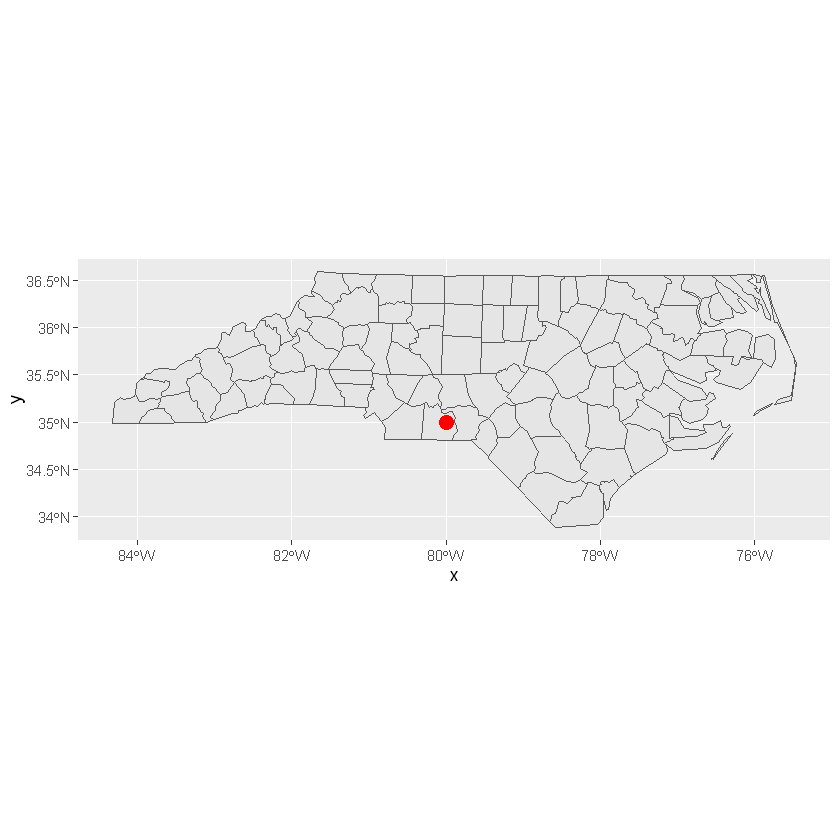

In [6]:
# You can also use layers with x and y aesthetics: these
# are assumed to already be in the common CRS.
    
ggplot(nc) +
  geom_sf() +
  annotate("point", x = -80, y = 35, colour = "red",
           size = 4)

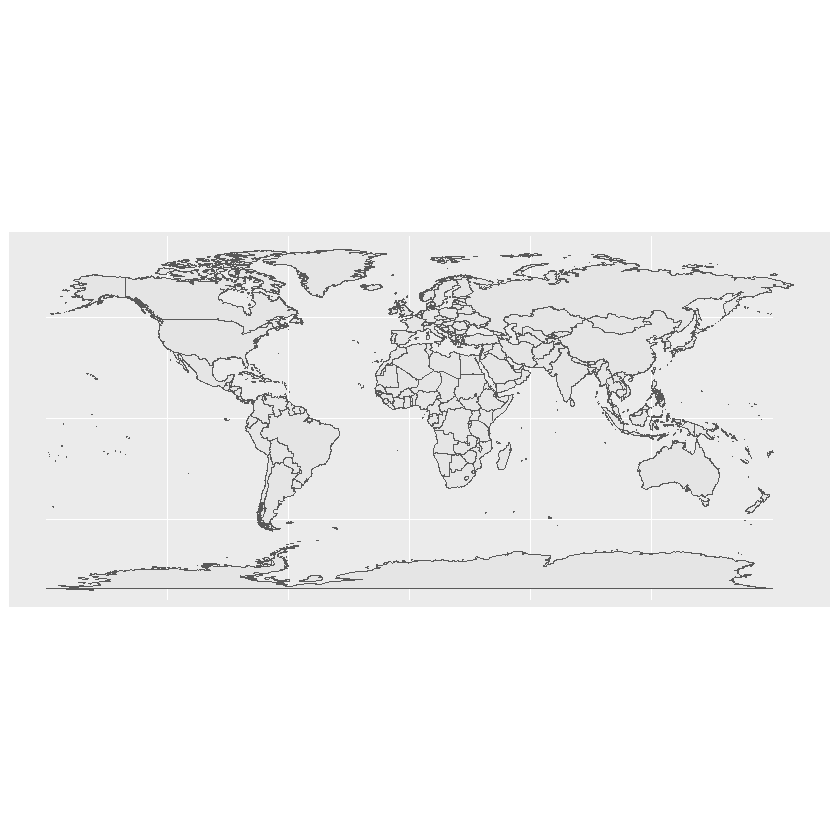

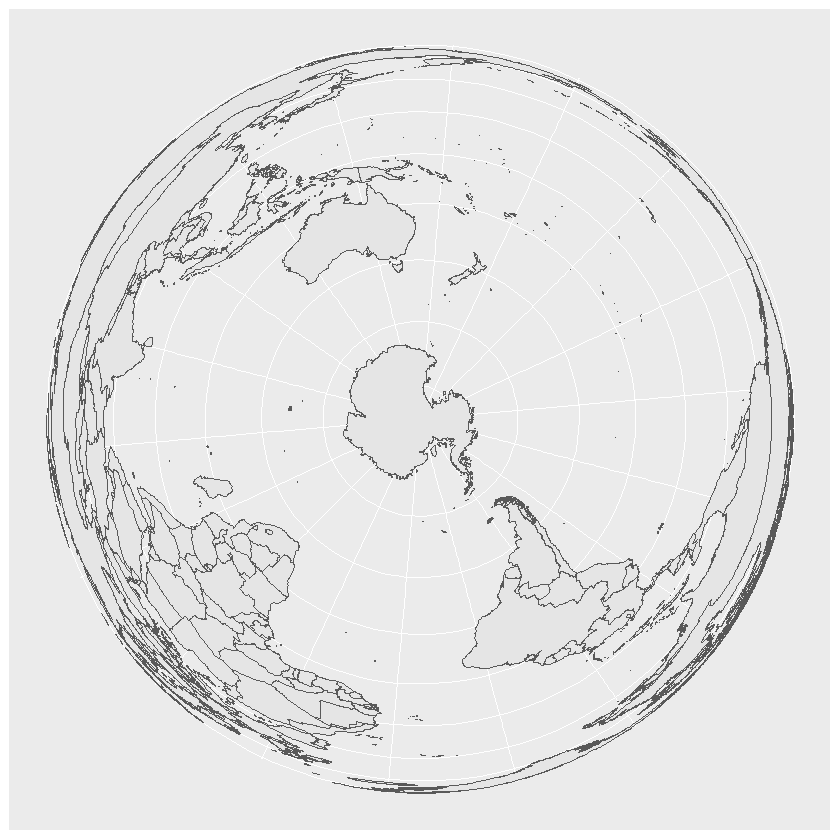

In [10]:
# Thanks to the power of sf, a geom_sf nicely handles
# varying projections setting the aspect ratio correctly.

library(maps)
world1 <- sf::st_as_sf(map('world', plot = FALSE,
                           fill = TRUE))
    
ggplot() + geom_sf(data = world1)
    
world2 <- sf::st_transform(
    world1,
    "+proj=laea +y_0=0 +lon_0=155 +lat_0=-90 +ellps=WGS84 +no_defs"
    )
    
ggplot() + geom_sf(data = world2)

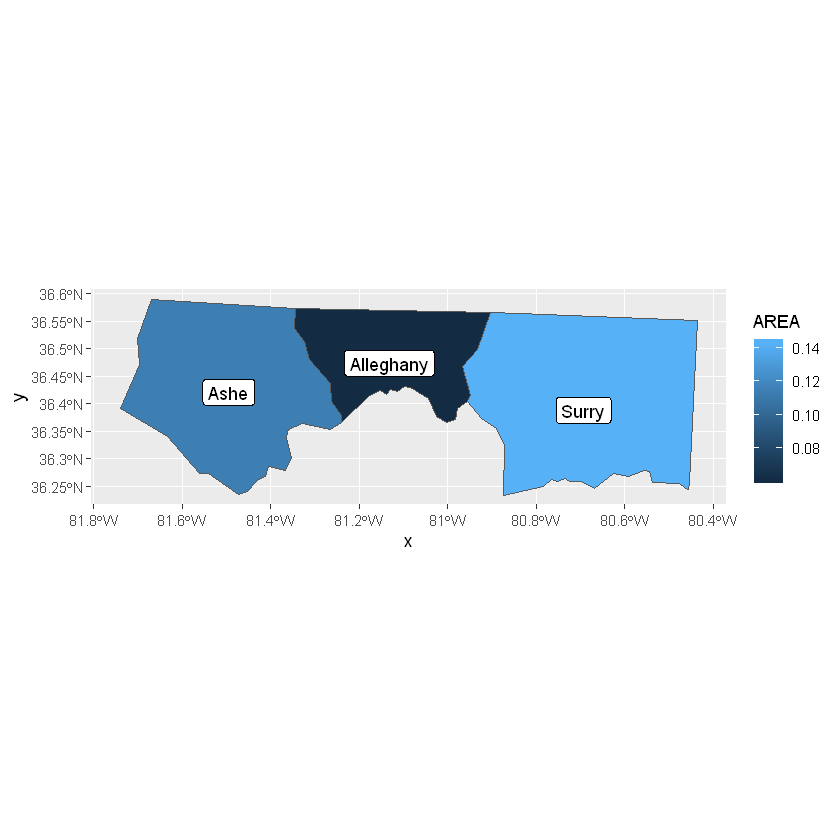

In [11]:
# To add labels, use geom_sf_label().
    
ggplot(nc_3857[1:3, ]) +
  geom_sf(aes(fill = AREA)) +
  geom_sf_label(aes(label = NAME))